In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
players=pd.read_csv('res/Players.csv', dtype='unicode')
Seasons=pd.read_csv('res/Seasons_Stats.csv', dtype='unicode')
#clean data
players['college'] = players['collage']
players.drop('collage', axis=1, inplace=True)
players.drop('Unnamed: 0', axis=1, inplace=True)
Seasons=Seasons[Seasons['Player'] !=0]
Seasons['Age'] = Seasons['Age'].apply(pd.to_numeric)
Seasons.drop('Unnamed: 0', axis=1,inplace=True)
Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']] = Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB','WS','PER','BPM','VORP']].apply(pd.to_numeric)
Seasons = Seasons.rename(index=str, columns={"PTS": "points", "Pos": "position", "Tm": "team", "G": "games", "GS": "games_started",
                                        "MP": "minutes_played", "BLK": "blocks", "TOV": "turnovers", "PF": "personal_fouls",
                                        "AST": "assists", "STL": "steals", "DRB": "defensive_rebounds", "ORB": "offensive_rebounds",
                                  "TRB": "total_rebounds", "WS": "win_shares"})
Seasons.head()
#players.dropna(how='all',inplace=True)
#players.set_index('Player',inplace=True)

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,FT%,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27,59.0


In [3]:
# fix height and weight
players[['height','weight']] = players[['height','weight']].apply(pd.to_numeric)
players['height'] = players['height'] * 0.0328084 # cm -> ft
players['weight'] = players['weight'] * 2.20462 # kg -> lb

In [4]:
#players['pos'] = players.Player.apply(lambda x: Seasons.Pos[Seasons.Player == x].values[0])
Seasons['height'] = Seasons.Player.apply(lambda x: players.height[players.Player == x].values)
Seasons['weight'] = Seasons.Player.apply(lambda x: players.weight[players.Player == x].values)
Seasons['college'] = Seasons.Player.apply(lambda x: players.college[players.Player == x].values)
Seasons['born'] = Seasons.Player.apply(lambda x: players.born[players.Player == x].values)
Seasons['birth_city'] = Seasons.Player.apply(lambda x: players.birth_city[players.Player == x].values)
Seasons['birth_state'] = Seasons.Player.apply(lambda x: players.birth_state[players.Player == x].values)
Seasons.head()

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,blocks,turnovers,personal_fouls,points,height,weight,college,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458.0,[5.905512],[169.75574],[Indiana University],[1918],[nan],[nan]
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279.0,[6.1679792],[182.98346],[University of Kentucky],[1921],[Yorktown],[Indiana]
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438.0,[6.3320212],[189.59732],[University of Notre Dame],[1924],[nan],[nan]
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]


In [5]:
Seasons['height'] = Seasons['height'].str.get(0)
Seasons['weight'] = Seasons['weight'].str.get(0)
Seasons['college'] = Seasons['college'].str.get(0)
Seasons['born'] = Seasons['born'].str.get(0)
Seasons['birth_city'] = Seasons['birth_city'].str.get(0)
Seasons['birth_state'] = Seasons['birth_state'].str.get(0)

In [6]:
Seasons['hall_of_fame'] = 0
Seasons.loc[Seasons['Player'].str.contains("\*", na=False), 'hall_of_fame'] = 1
Seasons['hall_of_fame'].apply(pd.to_numeric)
Seasons['Player'] = Seasons['Player'].str.replace("\*", "")

In [7]:
Seasons.columns.values

array(['Year', 'Player', 'position', 'Age', 'team', 'games',
       'games_started', 'minutes_played', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'win_shares', 'WS/48', 'blank2', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'personal_fouls', 'points', 'height',
       'weight', 'college', 'born', 'birth_city', 'birth_state',
       'hall_of_fame'], dtype=object)

In [8]:
#add columns for per game stats
Seasons['ppg'] = Seasons.points/Seasons.games
Seasons['spg'] = Seasons.steals/Seasons.games
Seasons['apg'] = Seasons.assists/Seasons.games
Seasons['orpg'] = Seasons.offensive_rebounds/Seasons.games
Seasons['drpg'] = Seasons.defensive_rebounds/Seasons.games
Seasons['rpg'] = Seasons.total_rebounds/Seasons.games
Seasons['bpg'] = Seasons['blocks']/Seasons.games

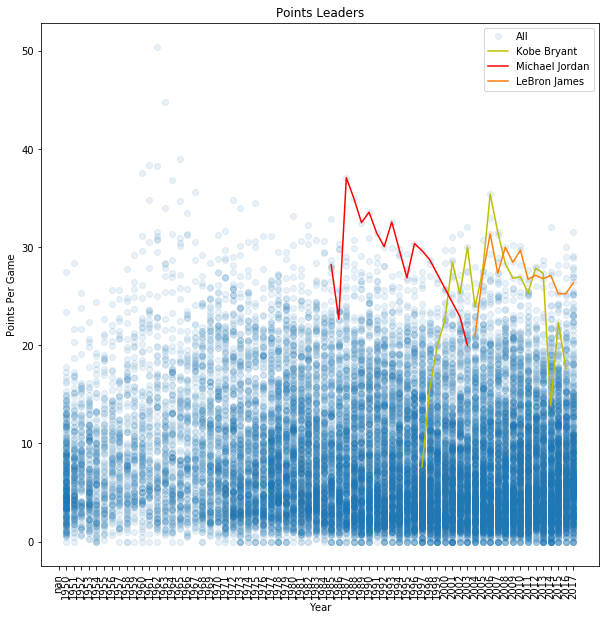

In [9]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['ppg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.ppg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.ppg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.ppg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Points Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [10]:
basic_info = Seasons[['Player', 'games', 'points', 'assists', 'total_rebounds', 'blocks', 'steals', 'hall_of_fame',
                     'win_shares', 'PER', 'VORP', 'BPM']]
basic_info.head()

,Player,games,points,assists,total_rebounds,blocks,steals,hall_of_fame,win_shares,PER,VORP,BPM
0,Curly Armstrong,63.0,458.0,176.0,NaN,NaN,NaN,0,3.5,NaN,NaN,NaN
1,Cliff Barker,49.0,279.0,109.0,NaN,NaN,NaN,0,2.2,NaN,NaN,NaN
2,Leo Barnhorst,67.0,438.0,140.0,NaN,NaN,NaN,0,3.6,NaN,NaN,NaN
3,Ed Bartels,15.0,63.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN
4,Ed Bartels,13.0,59.0,20.0,NaN,NaN,NaN,0,-0.6,NaN,NaN,NaN


In [11]:
career = basic_info.groupby('Player').agg('sum')
career['ppg'] = career.points/career.games
career['spg'] = career.steals/career.games
career['apg'] = career.assists/career.games
career['rpg'] = career.total_rebounds/career.games
career['bpg'] = career['blocks']/career.games
career['PER'].head()

Player
A.C. Green       249.7
A.J. Bramlett     -0.4
A.J. English      23.1
A.J. Guyton       13.1
A.J. Hammons       8.4
Name: PER, dtype: float64

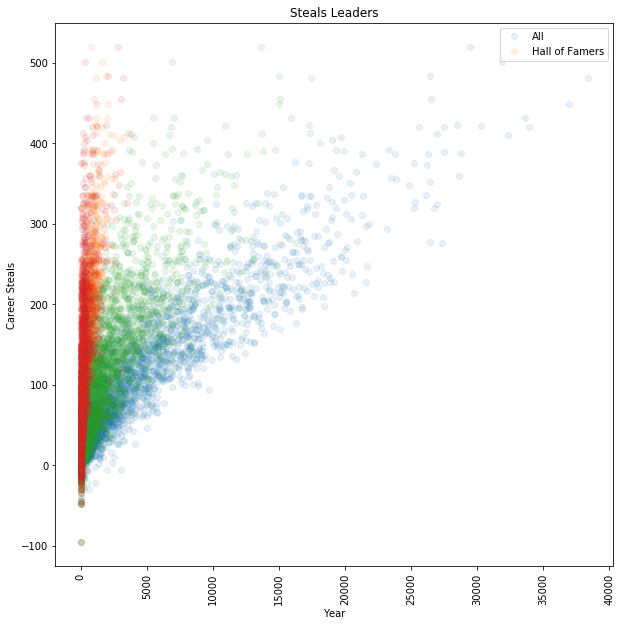

In [12]:
plt.figure(figsize = (10,10))
plt.plot(career['points'],career['PER'],'o', alpha = 0.1)
plt.plot(career['steals'],career['PER'],'o', alpha = 0.1)
plt.plot(career['total_rebounds'],career['PER'],'o', alpha = 0.1)
plt.plot(career['blocks'],career['PER'],'o', alpha = 0.1)
#plt.plot(career['assists'],career['PER'],'o', alpha = 0.1)
plt.legend(['All','Hall of Famers'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Career Steals')
plt.title('Steals Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
Seasons['PER']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
24661    14.0
24662    15.0
24663    11.4
24664    10.6
24665    10.1
24666    11.1
24667    21.4
24668    23.9
24669    15.4
24670    13.7
24671    11.7
24672     8.9
24673     7.6
24674    12.8
24675     6.7
24676     8.2
24677    18.8
24678    15.1
24679     6.2
24680    18.5
24681    15.0
24682    10.0
24683    11.4
24684    14.1
24685    14.9
24686    16.7
24687    13.0
24688     7.3
24689     6.9
24690    17.0
Name: PER, Length: 24691, dtype: float64

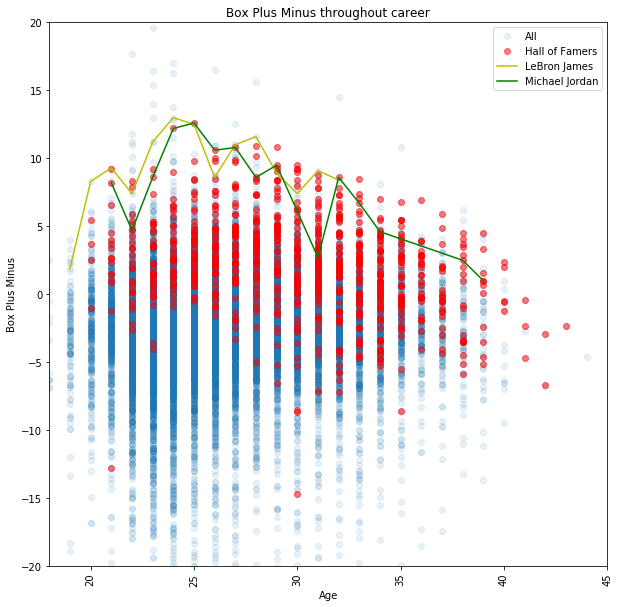

In [14]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['BPM'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.BPM[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.BPM[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.BPM[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Box Plus Minus')
plt.title('Box Plus Minus throughout career')
plt.axis([18, 45, -20, 20])
plt.xticks(rotation='vertical')
plt.show()

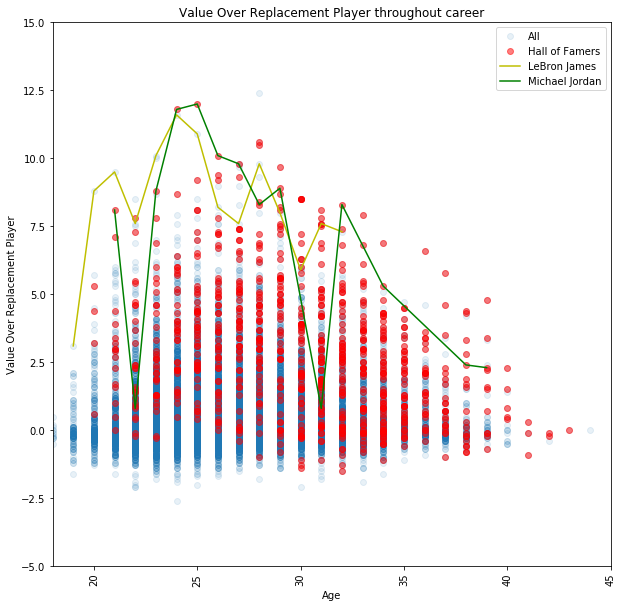

In [15]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['VORP'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.VORP[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.VORP[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.VORP[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Value Over Replacement Player')
plt.title('Value Over Replacement Player throughout career')
plt.axis([18, 45, -5, 15])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
Seasons['rating_per_game'] = Seasons['ppg'] + 1.5*Seasons['apg'] + 1.2*Seasons['rpg'] + 3*Seasons['spg'] + 3*Seasons['bpg']

In [16]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['rating_per_game'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.rating_per_game[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.rating_per_game[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.rating_per_game[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('rating')
plt.title('rating throughout career')
plt.axis([18, 45, -5, 15])
plt.xticks(rotation='vertical')
plt.show()

KeyError: 'rating_per_game'

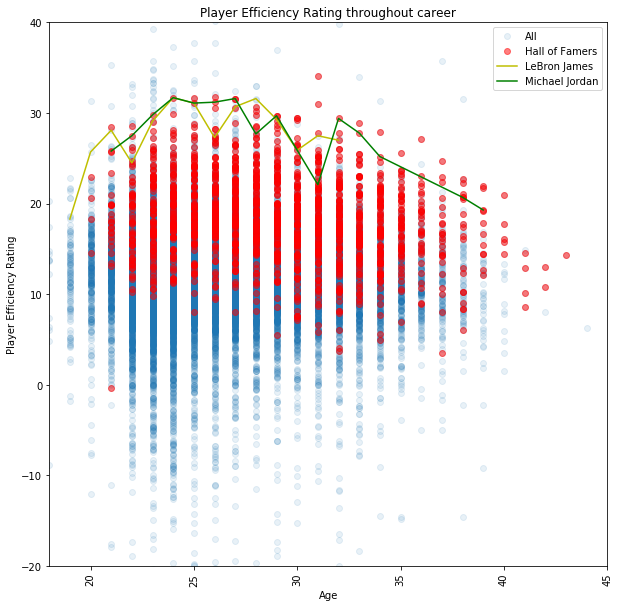

In [17]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Age'],Seasons['PER'],'o', alpha = 0.1)
plt.plot(Seasons.Age[Seasons.hall_of_fame > 0],Seasons.PER[Seasons.hall_of_fame > 0],'o', color = 'r', alpha = 0.5)
plt.plot(Seasons.Age[Seasons.Player == 'LeBron James'],Seasons.PER[Seasons.Player == 'LeBron James'],color='y')
plt.plot(Seasons.Age[Seasons.Player == 'Michael Jordan'],Seasons.PER[Seasons.Player == 'Michael Jordan'],color='g')
plt.legend(['All','Hall of Famers', 'LeBron James', 'Michael Jordan'], fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating')
plt.title('Player Efficiency Rating throughout career')
plt.axis([18, 45, -20, 40])
plt.xticks(rotation='vertical')
plt.show()

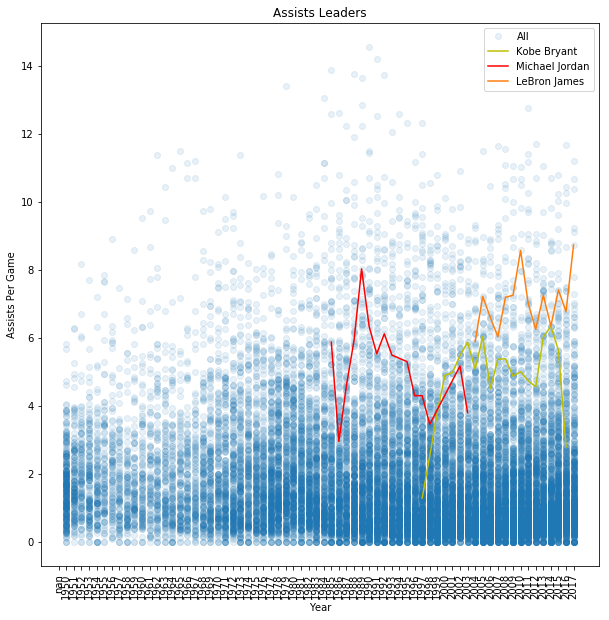

In [18]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['apg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.apg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.apg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.apg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.title('Assists Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

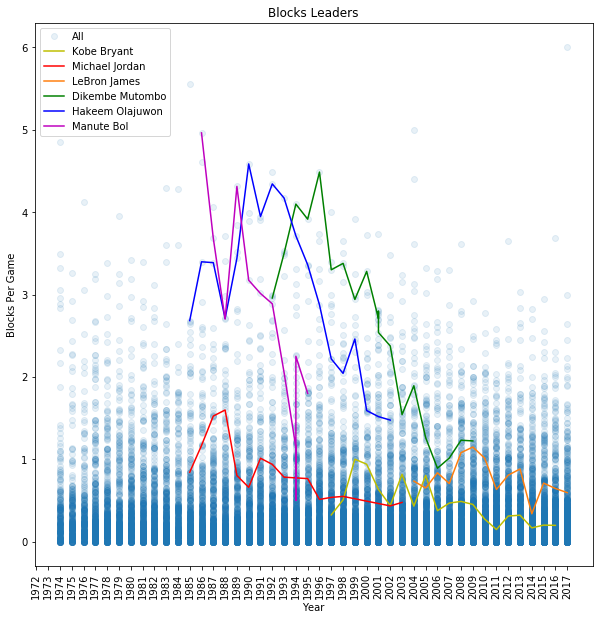

In [18]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['bpg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.bpg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.bpg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.bpg[Seasons.Player == 'LeBron James'])
plt.plot(Seasons.Year[Seasons.Player == 'Dikembe Mutombo'],Seasons.bpg[Seasons.Player == 'Dikembe Mutombo'], color = 'g')
plt.plot(Seasons.Year[Seasons.Player == 'Hakeem Olajuwon'],Seasons.bpg[Seasons.Player == 'Hakeem Olajuwon'], color = 'b')
plt.plot(Seasons.Year[Seasons.Player == 'Manute Bol'],Seasons.bpg[Seasons.Player == 'Manute Bol'], color = 'm')
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James', 'Dikembe Mutombo', 'Hakeem Olajuwon', 'Manute Bol'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Blocks Per Game')
plt.title('Blocks Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [35]:
Seasons.loc[Seasons['Year']=="2010", :].head()

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,hall_of_fame,ppg,spg,apg,orpg,drpg,rpg,bpg,rating_per_game,tier
19922,2010,Arron Afflalo,SG,24.0,DEN,82.0,75,2221,10.9,0.576,...,0,8.829268,0.560976,1.682927,0.719512,2.353659,3.073171,0.365854,17.821951,4.0
19923,2010,Alexis Ajinca,C,21.0,CHA,6.0,0,30,6.3,0.479,...,0,1.666667,0.166667,0.000000,0.166667,0.500000,0.666667,0.166667,3.466667,6.0
19924,2010,LaMarcus Aldridge,PF,24.0,POR,78.0,78,2922,18.2,0.535,...,0,17.858974,0.858974,2.051282,2.461538,5.576923,8.038462,0.615385,35.005128,2.0
19925,2010,Joe Alexander,SF,23.0,CHI,8.0,0,29,2.8,0.273,...,0,0.500000,0.125000,0.250000,0.250000,0.375000,0.625000,0.125000,2.375000,6.0
19926,2010,Malik Allen,PF,31.0,DEN,51.0,3,456,5.9,0.431,...,0,2.058824,0.215686,0.313725,0.705882,0.901961,1.607843,0.098039,5.400000,5.0


In [23]:
Seasons['rating_per_game'] = Seasons['ppg'] + 1.5*Seasons['apg'] + 1.2*Seasons['rpg'] + 3*Seasons['spg'] + 3*Seasons['bpg']
Seasons.loc[Seasons['rating_per_game'] > 45, 'tier'] = 1
Seasons.loc[(Seasons['rating_per_game'] > 35) & (Seasons['rating_per_game'] <= 45), 'tier'] = 2
Seasons.loc[(Seasons['rating_per_game'] > 25) & (Seasons['rating_per_game'] <= 35), 'tier'] = 3
Seasons.loc[(Seasons['rating_per_game'] > 15) & (Seasons['rating_per_game'] <= 25), 'tier'] = 4
Seasons.loc[(Seasons['rating_per_game'] > 5) & (Seasons['rating_per_game'] <= 15), 'tier'] = 5
Seasons.loc[(Seasons['rating_per_game'] <= 5), 'tier'] = 6

In [24]:
#decision tree classification
from sklearn.preprocessing import StandardScaler
features = ['ppg', 'apg', 'rpg', 'bpg', 'spg']
classify_seasons = Seasons
classify_seasons = classify_seasons.fillna(0)
X = classify_seasons[features]
y= classify_seasons['tier']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.89988660294832334

In [ ]:
HOF = Seasons[Seasons['hall_of_fame'] == '1']
sns.regplot(x=HOF["Age"], y=HOF["rating_per_game"])

In [ ]:
HOF.dropna()
sns.distplot(HOF["ppg"])

In [ ]:
#career.loc[career.index == 'Wilt Chamberlain']
sns.distplot(career['assists'])
career.head()

In [ ]:
fig = plt.figure(figsize = (10,10))
x = Seasons.steals[(Seasons.hall_of_fame == 'n')]
y = Seasons.PER[(Seasons.hall_of_fame == 'n')]
plt.plot(x, y, 'o', color='b')
x = Seasons.steals[(Seasons.hall_of_fame == 'y')]
y = Seasons.PER[(Seasons.hall_of_fame == 'y')]
plt.plot(x, y, 'o', color='r')


In [ ]:
vorp = pd.DataFrame()
vorp['player'] = Seasons.groupby('Player').mean()['VORP'].player
vorp['vorp'] = Seasons.groupby('Player').mean()['VORP'].values
vorp.sort('vorp', ascending = False).head(10)

In [ ]:
Seasons[Seasons['Player'] == "Michael Jordan"]

In [ ]:
fig = plt.figure(figsize = (10,10))
x = players.weight[(players.pos == 'PG')]
y = players.height[(players.pos == 'PG')]
plt.plot(x, y, 'o', color='r')
x = players.weight[(players.pos == 'SG')]
y = players.height[(players.pos == 'SG')]
plt.plot(x, y, 'o', color='b')
x = players.weight[(players.pos == 'SF')]
y = players.height[(players.pos == 'SF')]
plt.plot(x, y, 'o', color='m')
x = players.weight[(players.pos == 'PF')]
y = players.height[(players.pos == 'PF')]
plt.plot(x, y, 'o', color='g')
x = players.weight[(players.pos == 'C')]
y = players.height[(players.pos == 'C')]
plt.plot(x, y, 'o', color='y')
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(ft)')
plt.title('Positional Size')
plt.legend(['PG','SG','SF','PF','C'], loc = 1)
plt.show()